### TP 2: Visión por Computadora

Alumnos: Fabricio Lopretto (a1616), Santiago José Olaciregui (a1611)


Objetivo:
Implementar un detector de máximo enfoque sobre un video aplicando técnicas de análisis espectral similar al que utilizan lascámaras digitales modernas. El video a procesar será: “focus_video.mov”.

1. Se debe implementar un algoritmo que dada una imagen, o región, calcule la métrica propuesta en el paper"ImageSharpnessMeasureforBlurredImagesin FrequencyDomain“ y realizar tres experimentos:

1.1 Medición sobre todo el frame.

1.2 Medición sobre una ROI ubicada en el centro del frame. Areade la ROI = 5 o 10% del areatotal del frame.

1.3 Medición sobre una matriz de enfoque compuesta por un arreglo de NxM elementos rectangulares equiespaciados. N y M son valores arbitrarios, probar con varios valores 3x3, 7x5, etc… (al menos 3).

Para cada experimento se debe presentar :

- Una curva o varias curvas que muestren la evolución de la métrica framea framedonde se vea claramente cuando el algoritmo detecto el punto de máximo enfoque.

- Video con la ROI o matriz, graficada en rojo y superpuesta al video original para los framesque no están en foco y verde para los framesdonde se detecta la condición de máximo enfoque.

Observaciones: A partir de la publicación mencionada, se toma el siguiente algoritmo para el cálculo de la métrica de interés.

Input: Image I of size M×N.
Output: Image Quality measure (FM) where FM stands for Frequency Domain Image Blur Measure

Paso 1: Calcular F, que es la representación de la transformada de Fourier de la imagen I.

Paso 2: Encuentra Fc que se obtiene desplazando el origen de F al centro.

Paso 3: Calcular AF = abs (Fc) donde AF es el valor absoluto de la transformada de Fourier centrada de la imagen I.

Paso 4: Calcular M = máx (AF) donde M es el valor máximo del componente de frecuencia en F.

Paso 5: Calcular TH = el número total de píxeles en F cuyo valor de píxel > thres, donde thres = M/1000.

Paso 6: Calcule la medida de calidad de imagen (FM) a partir de la ecuación (1).

Image Quality Image (FM) = TH / M.N     (1)

In [1]:
# Instala las librerias necesarias
%pip install opencv-python
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importa las librerias necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

1.1 Medición sobre todo el Frame

In [3]:
def calcular_sharpness_FM(frame):
    """
    Calcula la métrica de nitidez (FM) basada en el paper.

    """

    # Convierte el frame a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Obtiene el tamaño de la imagen
    M, N = gray.shape
    
    # Obtiene la Transformada de Fourier
    F = np.fft.fft2(gray)
    
    # Shift para centrar la transformada en bajas frecuencias
    Fc = np.fft.fftshift(F)
    
    # Calcula el valor absoluto del espectro de frecuencias
    AF = np.abs(Fc)
    
    # Encuntra el valor maximo del espectro
    M_value = np.max(AF)
    
    # Calcula el umbral thres = M / 1000
    thres = M_value / 1000
    
    # Cuenta los pixeles que superan el umbral
    TH = np.sum(AF > thres)
    
    # Calcula la medida de nitidez (FM)
    FM = TH / (M * N)
    
    return FM


In [3]:
# Capta la ruta de la notebook
ruta_notebook = os.getcwd()

# Describe la ruta al video
video_path = ruta_notebook + '/focus_video.mov'

In [5]:
# Abre el video
cap = cv2.VideoCapture(video_path)

In [6]:
# Listas para almacenar las metricas de nitidez y los frames correspondientes
sharpness_metrics = []
frames_list = []

In [7]:
# Lee el video frame a frame
frame_id = 0
while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Calcula la metrica de nitidez para el frame actual
    sharpness_metric = calcular_sharpness_FM(frame)
    
    # Almacena la metrica y el frame actual
    sharpness_metrics.append(sharpness_metric)
    frames_list.append(frame)
    
    # Imprime el progreso
    print(f'Frame {frame_id}: Sharpness (FM) = {sharpness_metric}')
    frame_id += 1

# Libera el objeto de video
cap.release()

Frame 0: Sharpness (FM) = 0.007122395833333333
Frame 1: Sharpness (FM) = 0.007139756944444444
Frame 2: Sharpness (FM) = 0.007131076388888889
Frame 3: Sharpness (FM) = 0.007096354166666667
Frame 4: Sharpness (FM) = 0.0070182291666666665
Frame 5: Sharpness (FM) = 0.006983506944444444
Frame 6: Sharpness (FM) = 0.006983506944444444
Frame 7: Sharpness (FM) = 0.006888020833333334
Frame 8: Sharpness (FM) = 0.006896701388888889
Frame 9: Sharpness (FM) = 0.006861979166666666
Frame 10: Sharpness (FM) = 0.006844618055555555
Frame 11: Sharpness (FM) = 0.006844618055555555
Frame 12: Sharpness (FM) = 0.006844618055555555
Frame 13: Sharpness (FM) = 0.006888020833333334
Frame 14: Sharpness (FM) = 0.006905381944444444
Frame 15: Sharpness (FM) = 0.006818576388888889
Frame 16: Sharpness (FM) = 0.006861979166666666
Frame 17: Sharpness (FM) = 0.006879340277777778
Frame 18: Sharpness (FM) = 0.006888020833333334
Frame 19: Sharpness (FM) = 0.006888020833333334
Frame 20: Sharpness (FM) = 0.006861979166666666
F

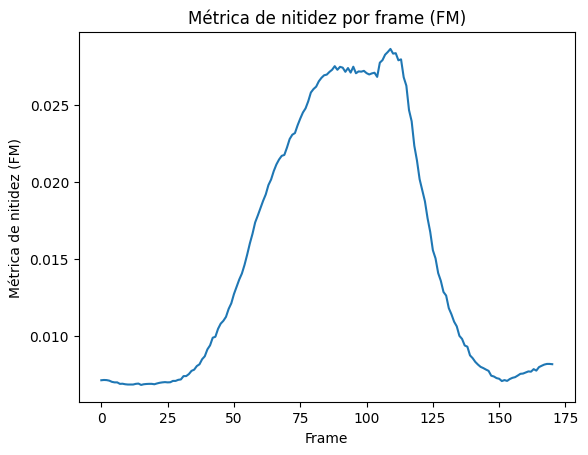

In [8]:
# Grafica las metricas de nitidez
plt.plot(sharpness_metrics)
plt.title('Métrica de nitidez por frame (FM)')
plt.xlabel('Frame')
plt.ylabel('Métrica de nitidez (FM)')
plt.show()

In [9]:
# Encuentra el frame con el maximo enfoque
max_sharpness_idx = np.argmax(sharpness_metrics)
print(f'El frame con máximo enfoque es el {max_sharpness_idx}, con una métrica de {sharpness_metrics[max_sharpness_idx]}')

El frame con máximo enfoque es el 109, con una métrica de 0.028624131944444443


In [10]:
# Muestra el frame con maximo enfoque
cv2.imshow('Frame con maximo enfoque', frames_list[max_sharpness_idx])
cv2.waitKey(0)
cv2.destroyAllWindows()

1.2 Medición sobre una ROI ubicada en el centro del frame. Área de la ROI = 5 o 10% del área total del frame: Se elige 5%.

In [11]:
def calcular_sharpness_FM_ROI(frame, roi_percentage=0.05):
    """ 
    Calcula la métrica de nitidez (FM) en una ROI determinada.
    
    """

    # Convierte el frame a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Obtiene el tamaño de la imagen
    M, N = gray.shape
    
    # Define el tamaño de la ROI basado en el porcentaje dado
    roi_size = int(np.sqrt(roi_percentage * M * N))
    start_row = (M - roi_size) // 2
    start_col = (N - roi_size) // 2
    
    # Extrae la ROI
    roi = gray[start_row:start_row+roi_size, start_col:start_col+roi_size]
    
    # Transformada de Fourier
    F = np.fft.fft2(roi)
    
    # Shift para centrar la transformada
    Fc = np.fft.fftshift(F)
    
    # Calcula el valor absoluto del espectro de frecuencias
    AF = np.abs(Fc)
    
    # Encuntra el valor maximo del espectro
    M_value = np.max(AF)
    
    # Calcula el umbral thres = M / 1000
    thres = M_value / 1000
    
    # Cuenta los pixeles que superan el umbral
    TH = np.sum(AF > thres)
    
    # Calcula la medida de nitidez (FM)
    FM = TH / (roi_size * roi_size)
    
    return FM


In [12]:
# Abre el video
cap = cv2.VideoCapture(video_path)

In [13]:
# Parametros
roi_percentage = 0.05
output_video_path = ruta_notebook + '/output_with_roi.avi'

In [14]:
# Obtiene propiedades del video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

In [15]:
# Crea el objeto VideoWriter para guardar el video modificado
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

In [16]:
# Listas para almacenar las metricas de nitidez y los frames correspondientes
sharpness_metrics = []
frames_list = []

In [17]:
# Lee el video frame a frame
frame_id = 0
while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Calcula la metrica de nitidez para el frame actual usando ROI del 5%
    sharpness_metric = calcular_sharpness_FM_ROI(frame, roi_percentage=0.05)
    
    # Almacena la metrica y el frame actual
    sharpness_metrics.append(sharpness_metric)
    frames_list.append(frame)
    
    # Imprime el progreso
    print(f'Frame {frame_id}: Sharpness (FM) = {sharpness_metric}')
    frame_id += 1


Frame 0: Sharpness (FM) = 0.07852214167176172
Frame 1: Sharpness (FM) = 0.0792208926543803
Frame 2: Sharpness (FM) = 0.0792208926543803
Frame 3: Sharpness (FM) = 0.07590182548694209
Frame 4: Sharpness (FM) = 0.07625120097825137
Frame 5: Sharpness (FM) = 0.07590182548694209
Frame 6: Sharpness (FM) = 0.07642588872390602
Frame 7: Sharpness (FM) = 0.07537776224997816
Frame 8: Sharpness (FM) = 0.07660057646956066
Frame 9: Sharpness (FM) = 0.0746790112673596
Frame 10: Sharpness (FM) = 0.07502838675866888
Frame 11: Sharpness (FM) = 0.07275744606515853
Frame 12: Sharpness (FM) = 0.07275744606515853
Frame 13: Sharpness (FM) = 0.07188400733688531
Frame 14: Sharpness (FM) = 0.07170931959123067
Frame 15: Sharpness (FM) = 0.07153463184557603
Frame 16: Sharpness (FM) = 0.07153463184557603
Frame 17: Sharpness (FM) = 0.07275744606515853
Frame 18: Sharpness (FM) = 0.07293213381081318
Frame 19: Sharpness (FM) = 0.07170931959123067
Frame 20: Sharpness (FM) = 0.0734561970477771
Frame 21: Sharpness (FM) = 

In [18]:
# Libera el objeto de video
cap.release()

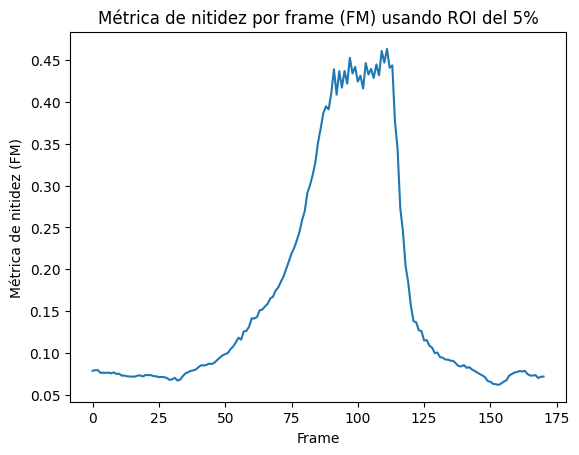

In [19]:
# Grafica las metricas de nitidez
plt.plot(sharpness_metrics)
plt.title('Métrica de nitidez por frame (FM) usando ROI del 5%')
plt.xlabel('Frame')
plt.ylabel('Métrica de nitidez (FM)')
plt.show()

In [20]:
# Encuentra el frame con el maximo enfoque
max_sharpness_idx = np.argmax(sharpness_metrics)
print(f'El frame con máximo enfoque es el {max_sharpness_idx}, con una métrica de {sharpness_metrics[max_sharpness_idx]}')

El frame con máximo enfoque es el 111, con una métrica de 0.4635339330945934


In [21]:
# Muestra el frame con maximo enfoque
cv2.imshow('Frame con maximo enfoque', frames_list[max_sharpness_idx])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
# Reabre el video para superponer las ROI
cap = cv2.VideoCapture(video_path)

In [23]:
frame_id = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Define la ROI
    M, N = frame.shape[:2]
    roi_size = int(np.sqrt(roi_percentage * M * N))
    start_row = (M - roi_size) // 2
    start_col = (N - roi_size) // 2
    end_row = start_row + roi_size
    end_col = start_col + roi_size
    
    # Dibuja el rectangulo ROI
    color = (0, 255, 0) if frame_id == max_sharpness_idx else (0, 0, 255)
    cv2.rectangle(frame, (start_col, start_row), (end_col, end_row), color, 2)
    
    # Guarda el frame en el nuevo video
    out.write(frame)
    
    frame_id += 1


In [24]:
# Libera el objeto de video
cap.release()
out.release()

In [25]:
print(f'Video guardado como {output_video_path}')

Video guardado como c:\Users\fabri\Documents\Posgrado\VpC1\entregables\TP2/output_with_roi.avi


1.3.a Medición sobre una matriz de enfoque compuesta por un arreglo de NxM elementos rectangulares equiespaciados. N y M son valores arbitrarios, probar con varios valores.

In [16]:
def calculate_fm(image):
    """
    

    """

    # Valida que la imagen no sea vacia
    if image.size == 0:
        return 0
    
    # Calcula la transformada de Fourier
    F = np.fft.fft2(image)
    # Centra la transformada de Fourier
    Fc = np.fft.fftshift(F)
    # Calcula la magnitud de la transformada centrada
    AF = np.abs(Fc)
    # Encuentra el valor maximo de la transformada
    M = np.max(AF)
    # Calcula el umbral (threshold)
    thres = M / 1000
    # Cuenta los pixeles que exceden el umbral
    TH = np.sum(AF > thres)
    # Calcula la metrica de nitidez (FM)
    fm_value = TH / (image.shape[0] * image.shape[1])
    
    return fm_value


In [ ]:

def process_video_in_grid_with_highlight(video_path, N, M, A):
    """
    
    """
    
    # Abre el video y toma propiedades del mismo
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))

    # Inicializa la matriz 3D para guardar los valores de FM (frames x N x M)
    fm_values_matrix = np.zeros((total_frames, N, M))
    
    # Configura la posicion inicial y el espacio entre cuadrados
    start_x, start_y = 250, 90
    space = A

    # Configura el archivo de salida de video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    output_path = ruta_notebook + f"/output_{N}x{M}.mp4"
    out = cv2.VideoWriter(output_path, fourcc, 30.0, (width, height))

    # Matriz que contiene el frame donde la metrica FM es máxima para cada cuadrado
    max_fm_frames = np.zeros((N, M), dtype=int)

    # Procesa todos los frames para calcular fm_values_matrix
    frame_idx = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Recorre los cuadrados en la cuadricula de N x M
        for i in range(N):
            for j in range(M):
                x = start_x + j * (A + space)
                y = start_y + i * (A + space)

                if (x + A <= width) and (y + A <= height):
                    square = gray_frame[y:y + A, x:x + A]
                    fm_value = calculate_fm(square)
                    fm_values_matrix[frame_idx, i, j] = fm_value

        frame_idx += 1

    # Encuentra el frame donde la metrica FM es maxima para cada cuadrado
    max_fm_frames = np.argmax(fm_values_matrix, axis=0)

    # Reinicia la captura de video para generar el nuevo video con los cuadrados
    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
    frame_idx = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Recorre los cuadrados en la cuadricula de N x M
        for i in range(N):
            for j in range(M):
                x = start_x + j * (A + space)
                y = start_y + i * (A + space)

                if (x + A <= width) and (y + A <= height):
                    if frame_idx == max_fm_frames[i, j]:
                        # Pinta el cuadrado de verde si es el frame de maxima metrica
                        cv2.rectangle(frame, (x, y), (x + A, y + A), (0, 255, 0), 2)  # Verde en BGR
                    else:
                        # Pinta el cuadrado de rojo en los demas frames
                        cv2.rectangle(frame, (x, y), (x + A, y + A), (0, 0, 255), 2)  # Rojo en BGR

        # Escribe el frame modificado en el archivo de salida
        out.write(frame)

        frame_idx += 1

    # Libera los recursos de video
    cap.release()
    out.release()

    return fm_values_matrix, max_fm_frames, output_path


In [ ]:
def plot_fm_values(fm_values_matrix, N, M):
    """
    

    """
    
    total_frames = fm_values_matrix.shape[0]
    
    plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
    
    # Recorre cada cuadrado (i, j) en la cuadricula
    for i in range(N):
        for j in range(M):
            # Extrae los valores de FM para el cuadrado (i, j) a lo largo de los frames
            fm_values = fm_values_matrix[:, i, j]

            # Ploteamos todas las curvas en el mismo grafico
            plt.plot(range(total_frames), fm_values, label=f'Cuadrado ({i}, {j})')

    # Etiquetas y titulo del grafico
    plt.xlabel('Frame')
    plt.ylabel('Métrica FM')
    plt.title('Evolución de la métrica FM en función del frame')
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))  # Ubicación de la leyenda
    plt.grid(True)
    plt.show()


In [ ]:
def print_max_fm_values(fm_values_matrix, N, M):
    """
    
    
    """
    
    total_frames = fm_values_matrix.shape[0]
    
    # Recorre cada cuadrado (i, j) en la cuadricula
    for i in range(N):
        for j in range(M):
            # Extrae los valores de FM para el cuadrado (i, j) a lo largo de los frames
            fm_values = fm_values_matrix[:, i, j]

            # Obtiene el valor maximo y el frame donde ocurre
            max_fm = np.max(fm_values)
            max_frame = np.argmax(fm_values)

            # Imprime el valor maximo y el frame correspondiente
            print(f'Cuadrado ({i}, {j}): Máx FM = {max_fm:.4f} en el frame {max_frame}')


En este caso usamos 3x3.

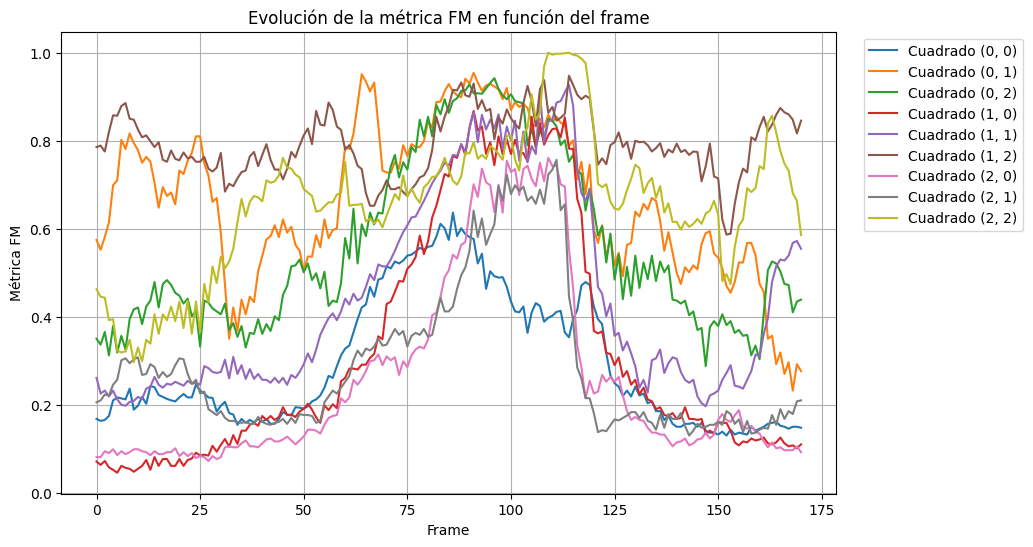

Cuadrado (0, 0): Máx FM = 0.6367 en el frame 86
Cuadrado (0, 1): Máx FM = 0.9544 en el frame 91
Cuadrado (0, 2): Máx FM = 0.9422 en el frame 96
Cuadrado (1, 0): Máx FM = 0.8678 en el frame 91
Cuadrado (1, 1): Máx FM = 0.9267 en el frame 114
Cuadrado (1, 2): Máx FM = 0.9478 en el frame 114
Cuadrado (2, 0): Máx FM = 0.7611 en el frame 109
Cuadrado (2, 1): Máx FM = 0.7567 en el frame 111
Cuadrado (2, 2): Máx FM = 1.0000 en el frame 109
Video generado con cuadrados verdes: c:\Users\fabri\Documents\Posgrado\VpC1\entregables\TP2/output_3x3.mp4


In [17]:
N = 3   # Numero de filas de cuadrados
M = 3   # Numero de columnas de cuadrados
A = 30  # Tamano del lado de cada cuadrado en pixeles

# Procesa el video y calcula la matriz 3D de metricas FM
fm_values_matrix, max_fm_frames, output_video = process_video_in_grid_with_highlight(video_path, N, M, A)

# Grafica los valores de la metrica FM para todos los cuadrados en el mismo grafico
plot_fm_values(fm_values_matrix, N, M)

# Imprime los valores maximos de FM y los frames correspondientes
print_max_fm_values(fm_values_matrix, N, M)

print(f"Video generado con cuadrados: {output_video}")

En este caso usamos 2x3.

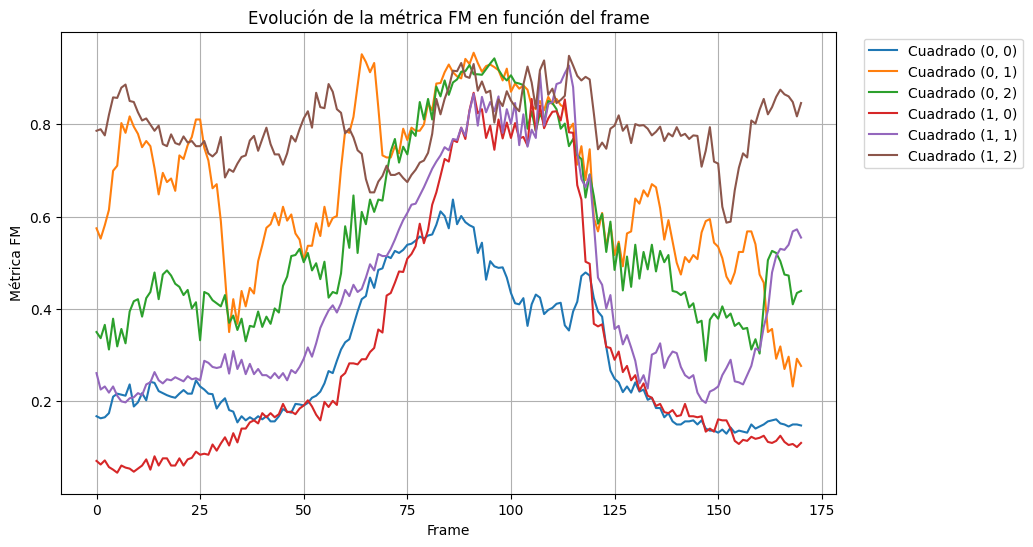

Cuadrado (0, 0): Máx FM = 0.6367 en el frame 86
Cuadrado (0, 1): Máx FM = 0.9544 en el frame 91
Cuadrado (0, 2): Máx FM = 0.9422 en el frame 96
Cuadrado (1, 0): Máx FM = 0.8678 en el frame 91
Cuadrado (1, 1): Máx FM = 0.9267 en el frame 114
Cuadrado (1, 2): Máx FM = 0.9478 en el frame 114
Video generado con cuadrados verdes: c:\Users\fabri\Documents\Posgrado\VpC1\entregables\TP2/output_2x3.mp4


In [18]:
N = 2   # Numero de filas de cuadrados
M = 3   # Numero de columnas de cuadrados
A = 30  # Tamano del lado de cada cuadrado en pixeles

# Procesa el video y calcula la matriz 3D de metricas FM
fm_values_matrix, max_fm_frames, output_video = process_video_in_grid_with_highlight(video_path, N, M, A)

# Grafica los valores de la metrica FM para todos los cuadrados en el mismo grafico
plot_fm_values(fm_values_matrix, N, M)

# Imprime los valores maximos de FM y los frames correspondientes
print_max_fm_values(fm_values_matrix, N, M)

print(f"Video generado con cuadrados: {output_video}")

En este caso usamos 4x3.

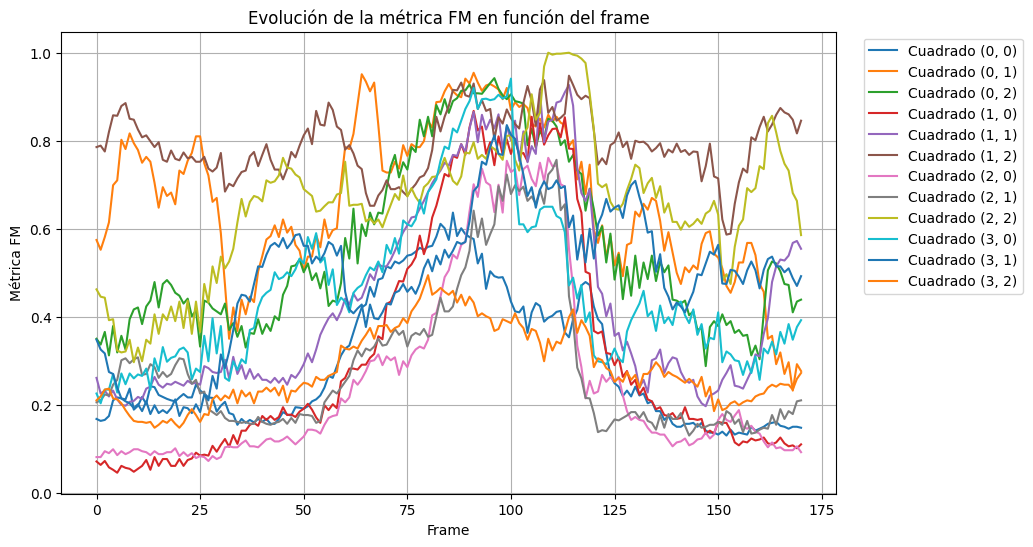

Cuadrado (0, 0): Máx FM = 0.6367 en el frame 86
Cuadrado (0, 1): Máx FM = 0.9544 en el frame 91
Cuadrado (0, 2): Máx FM = 0.9422 en el frame 96
Cuadrado (1, 0): Máx FM = 0.8678 en el frame 91
Cuadrado (1, 1): Máx FM = 0.9267 en el frame 114
Cuadrado (1, 2): Máx FM = 0.9478 en el frame 114
Cuadrado (2, 0): Máx FM = 0.7611 en el frame 109
Cuadrado (2, 1): Máx FM = 0.7567 en el frame 111
Cuadrado (2, 2): Máx FM = 1.0000 en el frame 109
Cuadrado (3, 0): Máx FM = 0.9411 en el frame 100
Cuadrado (3, 1): Máx FM = 0.8356 en el frame 99
Cuadrado (3, 2): Máx FM = 0.4944 en el frame 80
Video generado con cuadrados verdes: c:\Users\fabri\Documents\Posgrado\VpC1\entregables\TP2/output_4x3.mp4


In [19]:
N = 4   # Numero de filas de cuadrados
M = 3   # Numero de columnas de cuadrados
A = 30  # Tamano del lado de cada cuadrado en pixeles

# Procesa el video y calcula la matriz 3D de metricas FM
fm_values_matrix, max_fm_frames, output_video = process_video_in_grid_with_highlight(video_path, N, M, A)

# Grafica los valores de la metrica FM para todos los cuadrados en el mismo grafico
plot_fm_values(fm_values_matrix, N, M)

# Imprime los valores maximos de FM y los frames correspondientes
print_max_fm_values(fm_values_matrix, N, M)

print(f"Video generado con cuadrados: {output_video}")

### Conclusiones:

La siguiente tabla muestra los resultados entre los experimentos 1 y 2:

|Experimento    |Nº de Frame|  FM  |
|---------------|-----------|------|
|Frame completo |    109    |0.0286|
|ROI central 5% |    111    |0.4635|

Se observó que considerando la ROI centrada el valor de la métrica alcanzó un valor superior, lo que indica que en esa región es donde se concentra la mayor cantidad de píxeles con frecuencias eleveadas. Es decir ela región donde más nítidez presenta el video para los frames en donde se busca el foco.

Por otro lado, comparando las curvas de la métrica en función del frame, se apreció que el máximo en el caso del uso de ROI tiene un ancho (rango del dominio: frames), menor que considerando la totalidad de la imagen. Esto mostró que en el centro de la imagen la puesta en foco dura menos que considerando la totalidad de la imagen en la que se incluye la puesta en foco de los bordes.

A continuación se presentan las matrices de enfoque (3x3, 2x3 y 4x3 respectivamente) que almacenaron el número de frame en el que los bloques registran el máximo de métrica:

$$
\begin{bmatrix}
86 & 91 & 96 \\
91 & 114 & 114 \\
109 & 111 & 109
\end{bmatrix}
$$

$$
\begin{bmatrix}
86 & 91 & 96 \\
91 & 114 & 114
\end{bmatrix}
$$

$$
\begin{bmatrix}
86 & 91 & 96 \\
91 & 114 & 114 \\
109 & 111 & 109 \\
100 & 99 & 80
\end{bmatrix}
$$

Ante todo se observó que la nitidez de los bloques, en general, aumenta desde la esquina superior izquierda hacia la esquina inferior derecha. Además, comparando las curvas de métrica vs frame, se vió que al aumentar la cantidad de bloque de la matriz de enfoque las curvas presentan más ruido. Para los tres casos planteados de matriz de enfoque (3x3, 2x3 y 4x3), se observó que en algunos bloques se puede distirnguir que la curva toma la forma de campana, similar a lo que se vió considerando el frame completo o ela ROI central del 5%, mientras que en otros casos no. Esto puso en evidencia que en ciertas regiones la búsqueda y pérdida del foco fue ás clara que en otras.

#### Bibliografia

Kanjar and Masilamani. 2013. Image Sharpness Measure for Blurred Images in Frequency Domain. Procedia Engineering 64 ( 2013 ) 149 – 158.